<a href="https://colab.research.google.com/github/UurZer/Fashion-MNIST-using-Deep-Learning-with-TensorFlow-Keras/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# eğitim ve test için kullanacağımız resimler ve etiketler 
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
train_images.shape#Eğiteceğimiz resimler 28x28dır. 60.000 adet bulumaktadır.  

(60000, 28, 28)

In [ ]:
test_images.shape#Test için kullanacağımız resimler 28x28dır.10.000 adet bulumaktadır.  

(10000, 28, 28)

In [ ]:
train_images[0]#28x28 örnek bir resim

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
test_labels[0]#0. elamanın etiketi

9

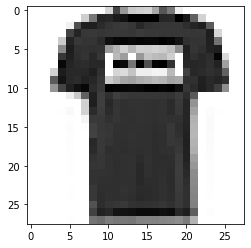

In [ ]:
digit=train_images[1]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()#1. Elemanın resimdeki karşılığı

In [ ]:
#Resimlerde bulunan piksel değerlerinin boyutlarını 0 ile 1  arasına getirerek normalize ediyoruz.
#Eğitim ve test verilerinin etiket boyutunu değiştiriyoruz.
train_images=train_images.reshape((60000,784))#28x28 veya 784 yazabiliriz.60.000 adet eğitim için resim bulunmaktadır 
train_images=train_images.astype("float32")/255

test_images=test_images.reshape((10000,784))#Burada tensorün şeklini değiştirdik.28x28=784 ve 60.000 adet test için resim bulunmaktadır 
test_images=test_images.astype("float32")/255

In [ ]:
train_images[0]#Değiştikten sonraki data detayı 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
from keras.utils.np_utils import to_categorical
#Eğitim ve Test için kullanıcağımız Labelları one-hot-encoding'e çevriliyor.
train_labels =to_categorical(train_labels)
test_labels =to_categorical(test_labels)

In [ ]:
train_labels#Değiştirilen bir etiket örneği

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras import models
from keras import layers
#Katmanlarımı eklediğimiz yapıdır.Giriş ara ve çıkış katmanı
network=models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(784,)))#Relu doğrusal olmayan bir aktivasyon fonksiyonudur.
network.add(layers.Dense(10,activation="softmax"))#Softmax çoklu sınıflandırmada kullanılır 

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',#categorical_crossentropy(çoklu sınıflandırmada kullanılır)Loss ise kayıp fonksiyonudur.
                metrics=['accuracy'])#Başarı ölçütü

In [ ]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)#Oluşturduğumuz ağı eğitiyoruz.
#Kayıp fonksiyonu(loss) sıfıra yaklaşması kayıbın azaldığı anlamına gelir.
#Başarı fonksiyonu(accuracy) bire yaklaştıkça başarılı olduğu anlama gelir.

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.7420 - accuracy: 0.7422
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3941 - accuracy: 0.8555
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3386 - accuracy: 0.8756
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3117 - accuracy: 0.8842
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2929 - accuracy: 0.8923


In [ ]:
#Şimdi ise artık eğittiğimiz ağımızı test için ayırdığımız verilerde deneme vakti
test_loss,test_acc=network.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.8668
